## Rseed Test
### Test 3a - Path length

This notebook tests whether the path lengths between syllable clusters of a given bird song is consistent across UMAP renditions.

Here, we start with the centroids of the clusters in the multiple UMAP embeddings of the 31 tutored bird dataset produced in `find_kmeans_centroids_of_rseed_embeddings.ipynb`.

We compute the euclidean distance between each pair of clusters in the shortest path connecting the syllable clusters of a given bird song, in these multiple UMAPs.

We check the consistency of the path length of a given bird song across different UMAP renditions.

#### Auxilliary functions

In [1]:
# Import packages
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from tqdm import tqdm
import itertools
import glob


In [2]:
def calc_distance(points):
    """ Calculate the euclidean distance between two centroids. """

    total_distance = 0

    for ind in np.arange(1,len(points)):
        curr_distance = distance.euclidean(points[ind-1], points[ind])
        total_distance += curr_distance

    
    return total_distance

In [3]:
def calc_shortest_distance(bird_id, centroids):
    """ Find the shortest path connecting a set of cluster centroids and calculate the corresponding path length. """

    if centroids.shape[0]<2:
        print('Bird ', bird_id, ' has <2 clusters:', centroids.shape[0])
        return 0
    
    # Find the shortest path by checking all path permutations (not efficient)
    all_permutations = np.array(list(itertools.permutations(centroids)))
    perm_distances = [calc_distance(permutation) for permutation in all_permutations]
    shortest_distance = np.min(perm_distances)

    return shortest_distance
        

In [4]:
def gather_path_info(bird_id, centroid_df,type='kmeans'):
    """ Wrapper function to calculate the shortest path length for a given birdsong. """

    if type=='ameans':
        bird_centroids = centroid_df.loc[centroid_df.bird_id==bird_id, ["centroid_x", "centroid_y"]].values
    elif type=='kmeans': # Using the improved clustering
        bird_centroids = centroid_df.loc[centroid_df.bird_id==bird_id, ["kcentroid_x", "kcentroid_y"]].values
    else:
        print("Type has to be kmeans/ameans.")

    n_syll = bird_centroids.shape[0]

    path_length = calc_shortest_distance(bird_id, bird_centroids)

    return path_length, n_syll

In [5]:
def gather_bird_path_lengths(centroid_df, n_birds, n_iter, rseed):
    """ Wrapper function to calculate the path lengths for all birdsongs. """

    bird_ids = np.arange(n_birds)
    # Find distance between all pairs of clusters
    for bird_id in bird_ids:
        dist, n_syll = gather_path_info(bird_id, centroid_df, type='ameans')
        kdist, n_syll = gather_path_info(bird_id, centroid_df, type='kmeans') # Using the improved clustering

        
        # Store the pairwise distance in the distance matrix
        distance_matrix[bird_id, n_iter] = kdist
        # distance_matrix[cluster2, cluster1, n_iter] = 0
        distance_dict['bird_id'].append(bird_id)
        distance_dict['iteration'].append(n_iter)
        distance_dict['rseed'].append(rseed)
        distance_dict['distance'].append(dist)
        distance_dict['kdistance'].append(kdist)
        distance_dict['n_syll'].append(n_syll)
        distance_dict['range_0_min'] = centroid_df['range_0_min'].values[0]
        distance_dict['range_1_min'] = centroid_df['range_1_max'].values[0]
        distance_dict['range_0_max'] = centroid_df['range_0_min'].values[0]
        distance_dict['range_1_max'] = centroid_df['range_1_max'].values[0]


#### Auxilliary information

In [6]:
# Assign paths for input and output files
results_folder ="../Results/"
embeddings_folder = results_folder + '/Embeddings/'
centroids_folder = results_folder + '/KCentroids/'
distances_folder = results_folder + '/KDistances/'


In [7]:
# Parameters
normalise = False
n_embeddings = 20
# Set the number of iterations and number of clusters expected (= # of digits) 
n_iterations = n_embeddings #len(rseeds)
n_birds  = 31 # Tutored birds

In [8]:
# List all files with the information of the centroids of the multiple UMAP embeddings
centroid_files = glob.glob(centroids_folder + 'centroids*.csv')

In [9]:
# Initialise data structures to hold all the path lengths for bird songs in each UMAP embedding
distance_matrix = np.zeros((n_birds, n_iterations))
distance_dict = {
    'bird_id': [],
    'iteration': [],
    'rseed': [],
    'distance': [],
    'kdistance': [],
    'n_syll': [],
    'range_0_min': [],
    'range_1_min': [],
    'range_0_max': [],
    'range_1_max': []
}

#### Path length calculation

In [10]:
# Compute the path lengths for all birdsongs in each UMAP embedding
for n_iter, centroid_file in enumerate(centroid_files):
    rseed = int(centroid_file.split('_')[-1].split('.')[0]) 

    # if normalise==False:
    #     centroid_file = embeddings_folder + 'UMAP_' + str(rseed) + '_centroid.csv'

    print(centroid_file)
    centroid_df = pd.read_csv(centroid_file)  

    gather_bird_path_lengths(centroid_df, n_birds, n_iter, rseed)

    


/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__56755036.csv
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__21081788.csv
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__26735830.csv
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__31632483.csv
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__96319575.csv
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__91090292.csv
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__13953367.csv
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results//KCentroids/centroids__4521373.csv
/home/remya/Work/AlamTest/Alam JC/Oct 202

In [12]:
# Save the distance matrix in an npy file
np.save(distances_folder +  'path_length_matrix' + '.npy', distance_matrix)

# Store the distance matrix in a csv file
distance_df = pd.DataFrame.from_dict(distance_dict)
distance_df.to_csv(distances_folder + 'path_length_df' + '.csv', index=True)  

In [13]:
distance_df

,bird_id,iteration,rseed,distance,kdistance,n_syll,range_0_min,range_1_min,range_0_max,range_1_max
0,0,0,56755036,49.603840,52.074928,6,-16.302376,17.834356,-16.302376,17.834356
1,1,0,56755036,47.494719,48.703142,5,-16.302376,17.834356,-16.302376,17.834356
2,2,0,56755036,35.715927,35.872187,6,-16.302376,17.834356,-16.302376,17.834356
3,3,0,56755036,13.242254,16.606300,4,-16.302376,17.834356,-16.302376,17.834356
4,4,0,56755036,44.055370,47.606559,4,-16.302376,17.834356,-16.302376,17.834356
...,...,...,...,...,...,...,...,...,...,...
615,26,19,88409749,26.443624,28.635379,3,-16.302376,17.834356,-16.302376,17.834356
616,27,19,88409749,33.342761,29.591575,4,-16.302376,17.834356,-16.302376,17.834356
617,28,19,88409749,29.202572,31.240902,5,-16.302376,17.834356,-16.302376,17.834356
618,29,19,88409749,17.325166,19.958627,4,-16.302376,17.834356,-16.302376,17.834356


In this dataframe, we store the path lengths for each birdsong across all UMAP embeddings.

- `bird_id`: Bird id (0-30)
- `iteration`: UMAP rendition number
- `n_syll`: Syllable count of the given bird
- `distance`: path length calculated as per the syllable labels given by the authors
- `kdistance`: path length calculated with improved clustering
- `rseed`: random seed initialising the UMAP
- `range_0_min`, `range_0_max`: UMAP range on one axis
- `range_1_min`, `range_1_max`: UMAP range on the other axis

### Analyses

#### Plotting the path lengths for each bird song across the several iterations

It shows that for a given birdsong, the path length varies to a great extent across UMAP renditions.

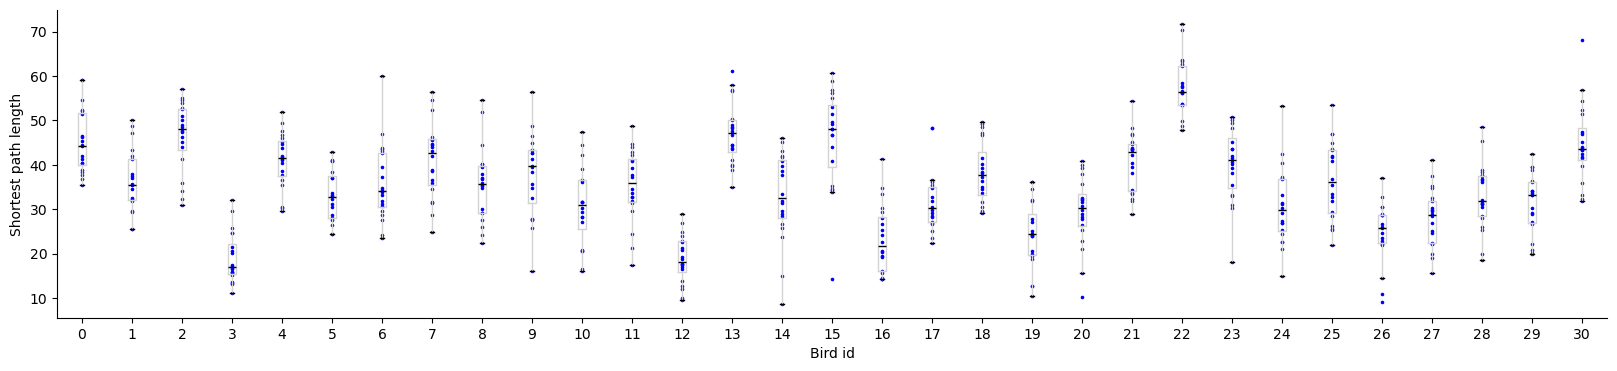

In [14]:
# Plot distances from all iterations for each pair of syllable clusters
fig, ax = plt.subplots(1, figsize=(20, 4))

# Iterating through all pairs of syllable
for i in np.arange(n_birds):
            # Make a box plot
            ax.boxplot(distance_matrix[i],
                   patch_artist=False,  # fill with color
                   positions = [i],
                   boxprops=dict(color='lightgrey'),
                   whiskerprops=dict(color='lightgrey'),
                   showfliers = False,
                   medianprops = dict(color='black')
                   ) 
            # Indicate each data point
            ax.scatter(np.zeros((n_iterations))+i, distance_matrix[i], s=10, color='blue', marker='.')


# Plot formatting
ax.set_ylabel('Shortest path length')
ax.set_xlabel('Bird id')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)



Fig: The x axis indicates the birdsong being tested. Each blue point shows the corresponding path length, in one UMAP representation.

The box plot describes the distribution of path lengths for a given bird.

In [15]:
# Saving the figure
fig.savefig(distances_folder + 'path_lengths_vs_seed.png', bbox_inches='tight')